<a href="https://colab.research.google.com/github/Nikhil07-source/Machine_Learning_Algorithms/blob/main/XG_Boost_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install xgboost

In [10]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Nikhil07-source/Datasets/refs/heads/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df[['Outcome']]

In [12]:
from sklearn.model_selection import train_test_split  #using sklearn library to split dataframe in train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

#Checking the shape of Train & Test Data
print('X Train shape: ', X_train.shape)
print('X Test shape: ', X_test.shape)
print('y Train shape: ', y_train.shape)
print('y Test shape: ', y_test.shape)

X Train shape:  (614, 8)
X Test shape:  (154, 8)
y Train shape:  (614, 1)
y Test shape:  (154, 1)


In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=1, n_estimators=350, max_depth=3)
#learning_rate, n_estimators, max_depth are the main parameter which we used most of the time.

xgb.fit(X_train, y_train) #model training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Importing Confusion Matrix and doing prediction with train data

In [14]:
#importing confusing matrix
from sklearn.metrics import confusion_matrix, classification_report #classification_report is for getting accuracy,precesion,recall etc.

####Doing prediction on Train Data

In [15]:
prediction_train = xgb.predict(X_train)

print(confusion_matrix(y_train,prediction_train))
print('*******************************************')
print(classification_report(y_train,prediction_train))

[[404   0]
 [  0 210]]
*******************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       210

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



####Doing prediction on Test Data

In [16]:
prediction_test = xgb.predict(X_test)

print("**********Confusion Matrix**********")
print(confusion_matrix(y_test,prediction_test))

print("**********Classification Report**********")
print(classification_report(y_test, prediction_test))

**********Confusion Matrix**********
[[75 21]
 [16 42]]
**********Classification Report**********
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        96
           1       0.67      0.72      0.69        58

    accuracy                           0.76       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.76      0.76      0.76       154



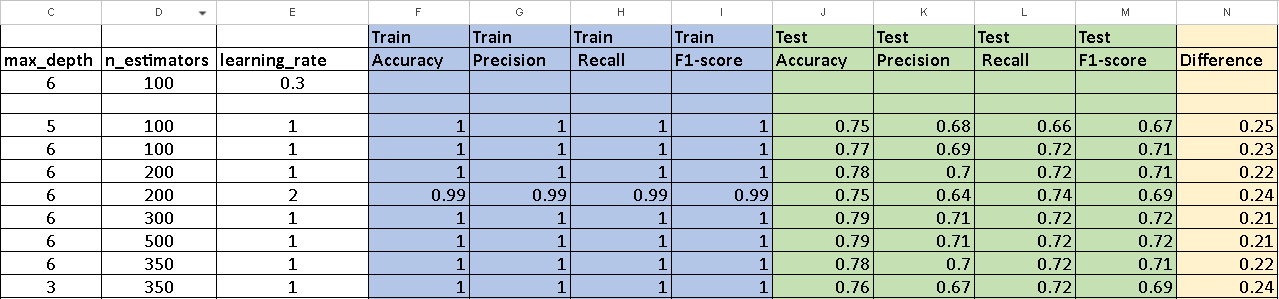